In [154]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import string
import pandas as pd
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [155]:
sources = pd.read_csv('datosencvesp.csv',sep=',')

sources


,Marca temporal,Fecha de nacimiento,Género,Nivel educacional,Comuna de residencia,1. ¿Cómo describirías la diferencia entre la expresión A y B?\nA. Empezó a llover en la madrugada.\nB. Se largó a llover en la madrugada.,2. ¿Cómo describirías la diferencia entre la expresión C y D?\nC. Luis se gana a vender aliños en la feria los sábados.\nD. Luis se pone a vender aliños en la feria los sábados.,3. ¿Cómo describirías la diferencia entre la expresión E y F?\nE. Paula se echó a correr cuando sintió ese ruido.\nF. Paula se largó a correr cuando sintió ese ruido.,4. ¿Cómo describirías la diferencia entre la expresión G y H?\nG. José se puso a trabajar como mueblista.\nH. José se metió a trabajar como mueblista.,5. ¿Cómo describirías la diferencia entre la expresión I y J?\nI. Roberto partió a estudiar temprano hoy día.\nJ. Roberto comenzó a estudiar temprano hoy día.,...,"6. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [La niña se largó a tener sed]","6. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [La niña empezó a tener sed]","6. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [La niña rompió a tener sed]","6. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [La niña se echó a tener sed]","7. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [Se pusieron a trabajar mil quinientas personas]","7. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [Se largaron a trabajar mil quinientas personas]","7. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [Empezaron a trabajar mil quinientas personas]","7. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [Rompieron a trabajar mil quinientas personas]","7. Ordena las siguientes frases de tal forma que la primera (1) sea la que te parece más natural (o menos forzada) hasta llegar a la última (5), menos natural (o más forzada). [Se echaron a trabajar mil quinientas personas]","¿Hubo ejemplos que te causaron mucha extrañeza o ""sonaron raros""?¿Podrías señalar cuáles y explicar con tus propias palabras por qué?"
0,12/09/2022 16:29:14,13/05/2002,mujer,Universitaria incompleta,macul,sinonimas,sinonimas,sinonimas,por alguna razón siento que en la h se siente ...,en la expresión i es como si roberto se despla...,...,4,1,5,3,2,3,1,5,4,en general los ejemplos de la niña me sonaron ...
1,12/09/2022 18:17:17,29/08/1996,Masculino,Universitaria incompleta,Ñuñoa,Una marca el comienzo de la lluvia y la otra s...,"No veo diferencia, ambas apuntan literalmente ...","No veo diferencia, ambas se refieren a la mism...","No veo diferencias, para mí ambas se refieren ...",La diferencia se puede adjudicar a que en la e...,...,4,1,5,2,1,3,2,5,4,"""La niña se puso a tener sed"" me parece poco u..."
2,12/09/2022 19:53:00,17/10/1995,Masculino,Universitaria completa,Quilicura,La segundo tiene un pronombre clitico,La primera tiene un verbo que forma parte de u...,La segundo se más intensa,Se puso a trabajar tiene una connotacion más v...,La primera tiene un sema de movimiento asociado,...,2,1,5,4,1,3,2,4,5,Rompieron a trabajar
3,20/09/2022 

In [156]:
valores=sources[["Fecha de nacimiento", "Nivel educacional"]]

In [157]:
valores['Fecha de nacimiento'] = pd.to_datetime(valores['Fecha de nacimiento'], format="%d/%m/%Y")

In [158]:
valores

,Fecha de nacimiento,Nivel educacional
0,2002-05-13,Universitaria incompleta
1,1996-08-29,Universitaria incompleta
2,1995-10-17,Universitaria completa
3,1998-08-13,Universitaria incompleta
4,1997-09-13,Universitaria incompleta
...,...,...
150,1999-03-24,Universitaria incompleta
151,1993-03-08,Universitaria completa
152,1999-11-22,Universitaria incompleta
153,2000-05-24,Universitaria incompleta


In [159]:
final = valores

In [160]:
final[:5]

,Fecha de nacimiento,Nivel educacional
0,2002-05-13,Universitaria incompleta
1,1996-08-29,Universitaria incompleta
2,1995-10-17,Universitaria completa
3,1998-08-13,Universitaria incompleta
4,1997-09-13,Universitaria incompleta


In [161]:
type(final)

pandas.core.frame.DataFrame

In [162]:
final

,Fecha de nacimiento,Nivel educacional
0,2002-05-13,Universitaria incompleta
1,1996-08-29,Universitaria incompleta
2,1995-10-17,Universitaria completa
3,1998-08-13,Universitaria incompleta
4,1997-09-13,Universitaria incompleta
...,...,...
150,1999-03-24,Universitaria incompleta
151,1993-03-08,Universitaria completa
152,1999-11-22,Universitaria incompleta
153,2000-05-24,Universitaria incompleta


In [163]:
by_year = final.sort_values('Nivel educacional')
by_year.head()

,Fecha de nacimiento,Nivel educacional
117,2003-12-08,Enseñanza básica/media completa
73,2003-05-29,Enseñanza básica/media completa
66,1996-06-22,Enseñanza básica/media completa
143,2004-09-28,Enseñanza básica/media completa
115,2003-08-05,Enseñanza básica/media completa


In [170]:
by_year.to_csv('example.csv')

In [180]:
final.to_csv('example2.csv')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


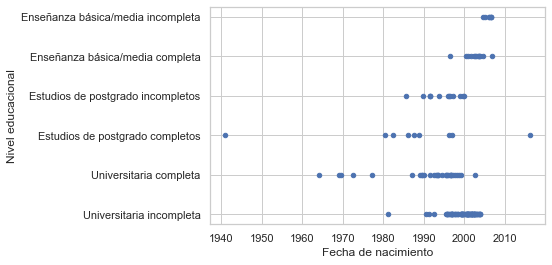

In [194]:
my_plot = final.plot("Fecha de nacimiento", "Nivel educacional", kind="scatter")
plt.show() # no necesariamente en Jupyter Notebooks

In [165]:
import seaborn as sns

In [166]:
sns.set_theme()

<AxesSubplot:xlabel='Fecha de nacimiento', ylabel='Nivel educacional'>

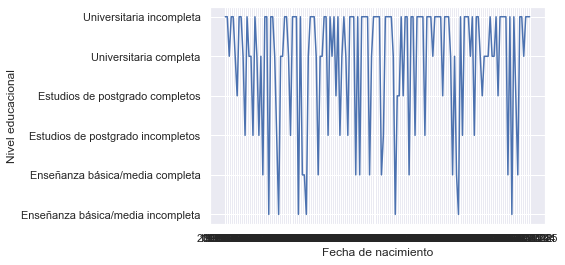

In [181]:
data = pd.read_csv("example2.csv") 
  
sns.lineplot(data['Fecha de nacimiento'], data['Nivel educacional'])

<AxesSubplot:xlabel='Fecha de nacimiento', ylabel='Nivel educacional'>

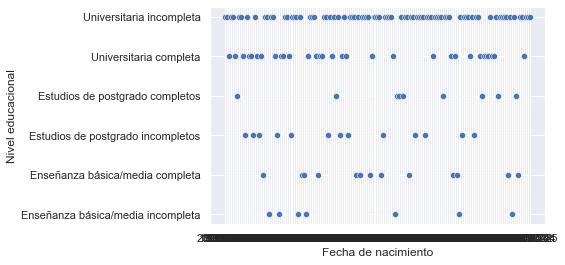

In [183]:
data = pd.read_csv("example2.csv") 
  
sns.scatterplot(data['Fecha de nacimiento'], data['Nivel educacional'])

In [188]:
data = pd.read_csv("datosencvesp.csv") 

[Text(0, 0.5, '')]

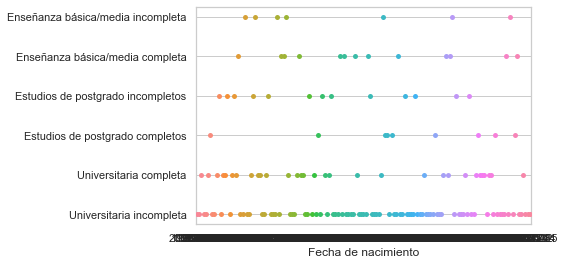

In [190]:
ax = sns.swarmplot(data=df, x="Fecha de nacimiento", y="Nivel educacional")
ax.set(ylabel="")

<AxesSubplot:xlabel='Fecha de nacimiento', ylabel='Nivel educacional'>

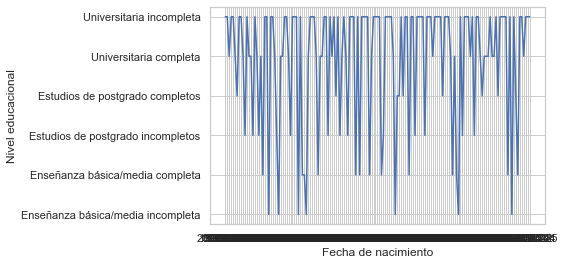

In [186]:
import seaborn  
  
seaborn.set(style = 'whitegrid')  
  
data = pandas.read_csv("example2.csv") 
seaborn.lineplot(x ='Fecha de nacimiento', y ='Nivel educacional', data = data)

In [138]:
dic1 = dict(zip(final['Fecha de nacimiento'], final['Nivel educacional']))

In [139]:
dic1

{Timestamp('2002-05-13 00:00:00'): 'Universitaria incompleta',
 Timestamp('1996-08-29 00:00:00'): 'Universitaria incompleta',
 Timestamp('1995-10-17 00:00:00'): 'Universitaria completa',
 Timestamp('1998-08-13 00:00:00'): 'Universitaria incompleta',
 Timestamp('1997-09-13 00:00:00'): 'Universitaria incompleta',
 Timestamp('1991-07-06 00:00:00'): 'Universitaria completa',
 Timestamp('2016-03-12 00:00:00'): 'Estudios de postgrado completos',
 Timestamp('2000-10-23 00:00:00'): 'Universitaria incompleta',
 Timestamp('1997-06-04 00:00:00'): 'Universitaria incompleta',
 Timestamp('1995-08-10 00:00:00'): 'Universitaria completa',
 Timestamp('1996-06-02 00:00:00'): 'Estudios de postgrado incompletos',
 Timestamp('1997-01-18 00:00:00'): 'Universitaria incompleta',
 Timestamp('1987-01-15 00:00:00'): 'Universitaria completa',
 Timestamp('1995-12-18 00:00:00'): 'Universitaria completa',
 Timestamp('1996-01-17 00:00:00'): 'Estudios de postgrado incompletos',
 Timestamp('2000-03-02 00:00:00'): 'Univ

In [ ]:
tips = sns.load_dataset("tips")
tips.head()